# Моделирование | «Фурье Фильтрация»

В файле задания находится зашумленный сигнал, замеренный с интервалом $0.1$ мс. Число замеров $N = 10^5 $. Шум случайный. Получить значение частот полезного сигнала. Выделить сигнал из зашумленных данных и построить его график от времени. Номер файла с данными соответствует номеру варианта. Формат данных двоичный. Амплитуды гармоник полезного сигнала минимум вдвое больше амплитуды гармоник шума.

In [675]:
import numpy as np


data_path = './signal2.npy'
signal_data = np.load(data_path)


signal_data.shape, signal_data[:10]

((100000,),
 array([  0.        ,  41.26149418,  23.86003856, -26.29716328,
         27.97931311,  45.54404752,  22.58279034,  29.81737585,
          3.14479353,  -8.73655947]))

In [676]:
# Define parameters
sampling_interval = 0.0001  # seconds
N = len(signal_data)
sampling_rate = 1 / sampling_interval  # Hz
duration = N * sampling_interval  # Total duration of the signal in seconds


# Perform FFT
fft_values = np.fft.fft(signal_data)
frequencies = np.fft.fftfreq(N, d=sampling_interval)  # Frequency bins
amplitudes = np.abs(fft_values) / N

# Filter out only the positive frequencies and their amplitudes
positive_frequencies = frequencies[frequencies >= 0]
positive_amplitudes = amplitudes[frequencies >= 0]

# Identify significant frequencies (for example, you could set a threshold)
threshold = 0.1 * np.max(positive_amplitudes)
significant_frequencies = positive_frequencies[positive_amplitudes > threshold]

sampling_rate

10000.0

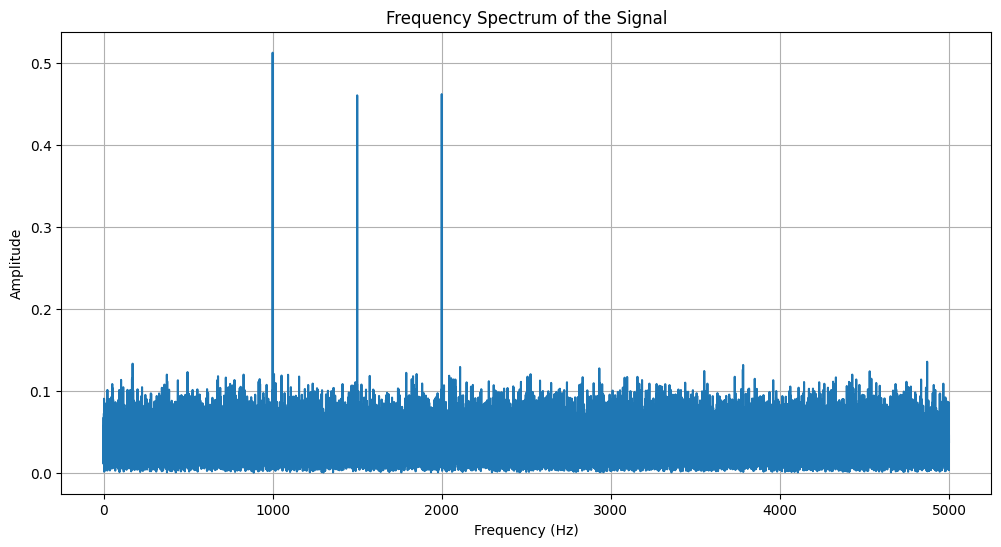

In [677]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(frequencies[:N//2], amplitudes[:N//2])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Frequency Spectrum of the Signal')
plt.grid(True)
plt.show()

In [678]:
from scipy.signal import butter, filtfilt

# Define a band-pass filter to isolate the significant frequencies
def bandpass_filter(data, lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    y = filtfilt(b, a, data)
    return y

lowcut = min(significant_frequencies)
highcut = max(significant_frequencies)

filtered_signal = bandpass_filter(signal_data, lowcut, highcut, sampling_rate)


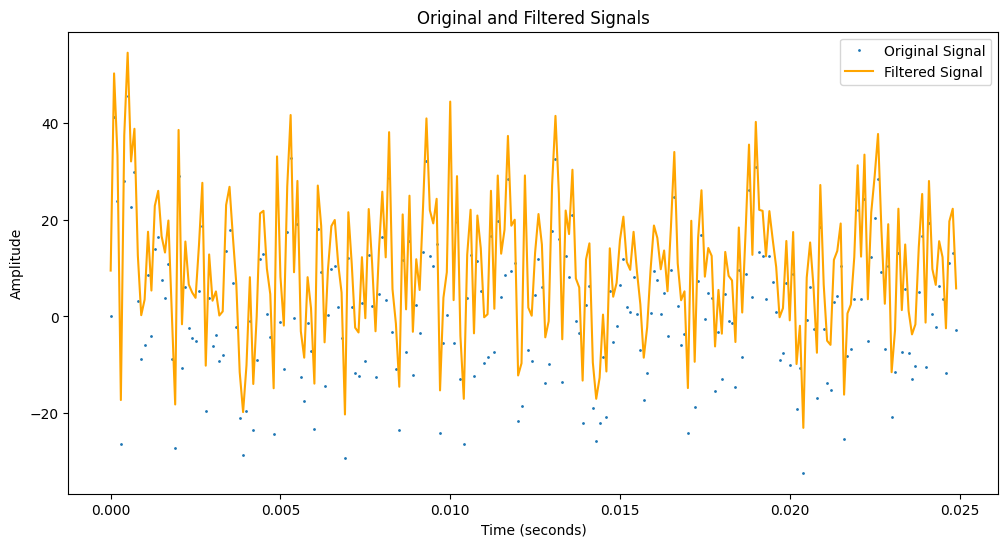

In [679]:
plt.figure(figsize=(12, 6))

cutoff = 250;

sampling_interval = 0.1e-3  # 0.1 milliseconds in seconds
time_array = np.arange(len(signal_data)) * sampling_interval

plt.plot(time_array[:cutoff], signal_data[:cutoff], 'o', markersize=1, label='Original Signal')
plt.plot(time_array[:cutoff], filtered_signal[:cutoff], label='Filtered Signal', color='orange')
plt.title('Original and Filtered Signals')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.legend()

plt.show()
